In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r'C:\Users\yvams\Desktop\projects_mech\Machining forces and temperature.csv')

In [3]:
df.head()

,Rake,UCT,V,SCF,TEMP
0,-3.0,0.1,100,874,164
1,-3.0,0.1,200,895,184
2,-3.0,0.1,400,945,208
3,-3.0,0.1,600,890,221
4,-3.0,0.1,800,931,228


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rake    196 non-null    float64
 1   UCT     196 non-null    float64
 2   V       196 non-null    int64  
 3   SCF     196 non-null    int64  
 4   TEMP    196 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 7.8 KB


In [5]:
# Descriptive statistics
df.describe()

,Rake,UCT,V,SCF,TEMP
count,196.000000,196.00000,196.000000,196.000000,196.000000
mean,8.928571,0.25000,614.285714,650.954082,205.750000
std,8.225663,0.11209,380.552904,110.181216,26.387716
min,-3.000000,0.10000,100.000000,453.000000,143.000000
25%,0.000000,0.17500,200.000000,564.500000,187.750000
50%,8.000000,0.25000,600.000000,646.500000,208.000000
75%,17.500000,0.32500,1000.000000,707.250000,225.000000
max,20.000000,0.40000,1200.000000,963.000000,264.000000


In [6]:
# Checking for missing data
df.isnull().sum()

Rake    0
UCT     0
V       0
SCF     0
TEMP    0
dtype: int64

No missing data in our dataset

<AxesSubplot:>

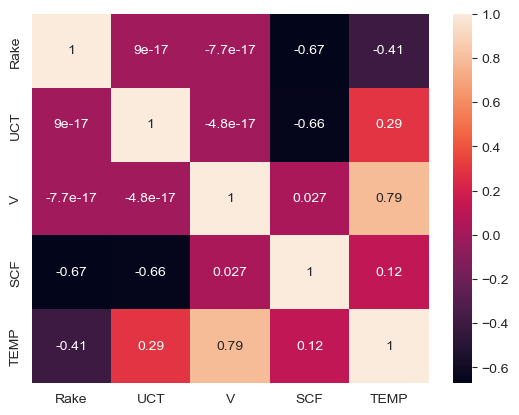

In [7]:
# Correlation
correlations = df.corr()
sns.heatmap(correlations, annot=True)

The rake aangle and uncut chip thickness has a high negative correlation with the specific cutting force. Also, the cutting speed is highly correlated with max temperature. On the other hand, the cutting speed does not have a good correlation with the specific cutting force. The cutting force is also weakly correlated with the max temperature.

In [8]:
# dividing the dataset to the input variables and output variables
x = df.iloc[:,0:-2]
y= df.iloc[:,-2:]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=190)

In [11]:
# Normalization
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping

# ANN Architectures

Shallow and Narrow Network

In [13]:
# model_1 - Shallow and narrow network
# model_2 - Shallow and wide network
# model_3 - Deep and wide network
# model_4 - Deep and narrow network

In [14]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'relu'))
model_1.add(Dense(8, activation = 'relu'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 32        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


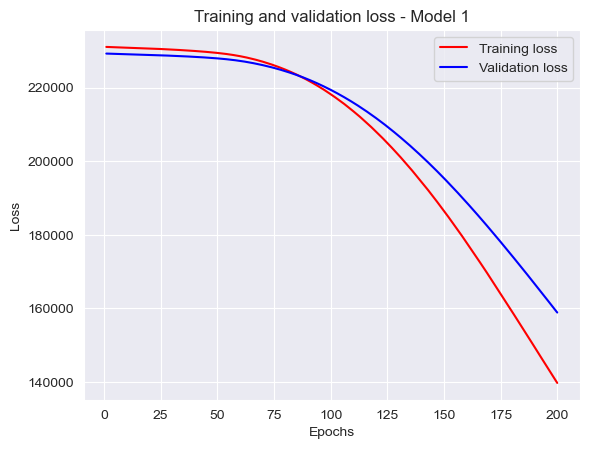

In [15]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 184ms/step
Predicted values are:  [[196.8454  153.4637 ]
 [119.34344  91.91222]
 [261.39008 202.60115]
 [146.28552 114.50117]
 [ 97.35321  77.03912]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Shallow and wide

In [17]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=3, activation = 'relu'))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


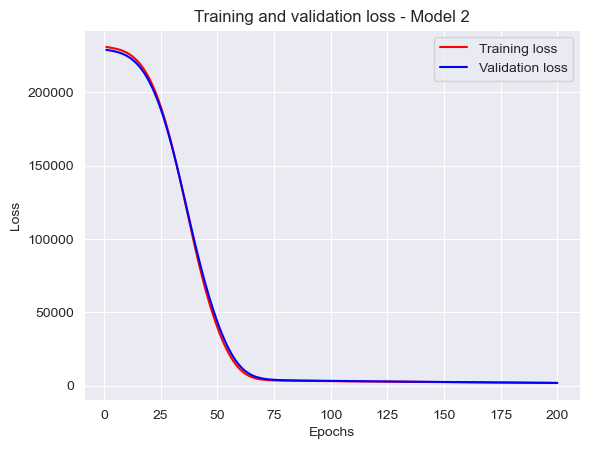

In [18]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 119ms/step
Predicted values are:  [[731.6965  233.76086]
 [727.5342  234.43059]
 [604.358   202.13672]
 [726.4678  225.91263]
 [908.29816 274.63043]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and wide

In [20]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=3, activation='relu'))
model_3.add(Dense(128, activation='relu'))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(48, activation='relu'))
model_3.add(Dense(48, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               512       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 48)                3120      
                                                                 
 dense_10 (Dense)            (None, 48)                2352      
                                                                 
 dense_11 (Dense)            (None, 32)                1568      
                                                                 
 dense_12 (Dense)            (None, 32)               

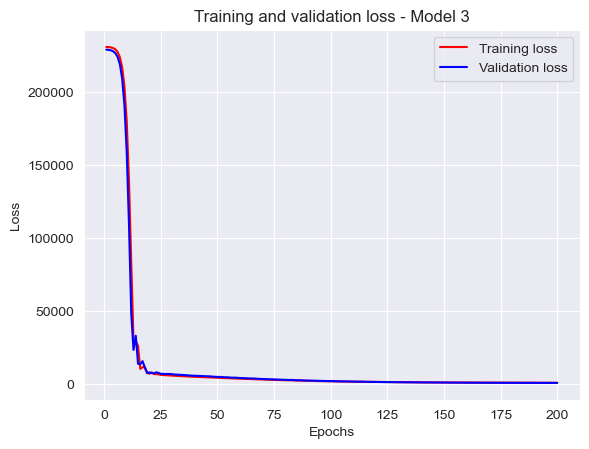

In [21]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 176ms/step
Predicted values are: 
 [[712.70526 224.33377]
 [695.767   219.18231]
 [584.62604 184.60548]
 [737.9055  232.00076]
 [865.4676  271.82245]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Deep and Narrow Network

In [23]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(8, activation='relu'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 32        
                                                                 
 dense_15 (Dense)            (None, 8)                 72        
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


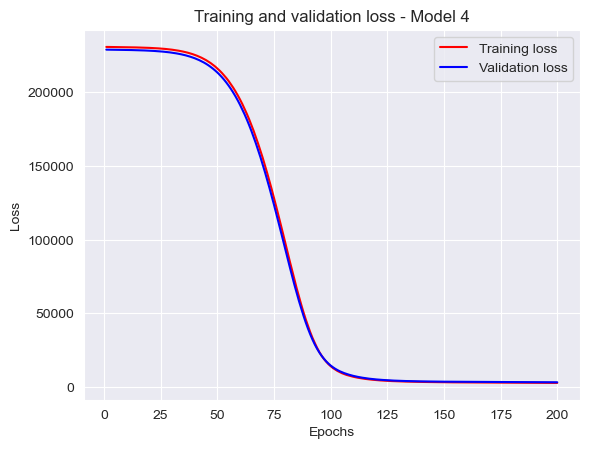

In [24]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 139ms/step
Predicted values are: 
 [[762.9762  241.41821]
 [731.421   231.97723]
 [580.91223 184.95917]
 [760.30786 240.07314]
 [936.66394 295.2905 ]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


Finding the optimal ANN architecture

In [26]:
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from Model 1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from Model 4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 6ms/step - loss: 3816.9688 - mae: 49.1767

Mean squared error and Mean absolute error from Model 1 is  177550.047 and  340.547 respectively

Mean squared error and Mean absolute error from Model 2 is  2129.708 and  36.599 respectively

Mean squared error and Mean absolute error from Model 3 is  1415.556 and  28.352 respectively

Mean squared error and Mean absolute error from Model 4 is  3816.969 and  49.177 respectively


Optimal ANN architecture is the Deep and Wide Network because it has the least mean absolute error.

# Changing the activation function

In [27]:
model_1 = Sequential()
model_1.add(Dense(8, input_dim=3, activation = 'tanh'))
model_1.add(Dense(8, activation = 'tanh'))
model_1.add(Dense(2, activation='linear'))
model_1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_1.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience = 10)
history1 = model_1.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping], verbose=0)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 32        
                                                                 
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 2)                 18        
                                                                 
Total params: 122
Trainable params: 122
Non-trainable params: 0
_________________________________________________________________


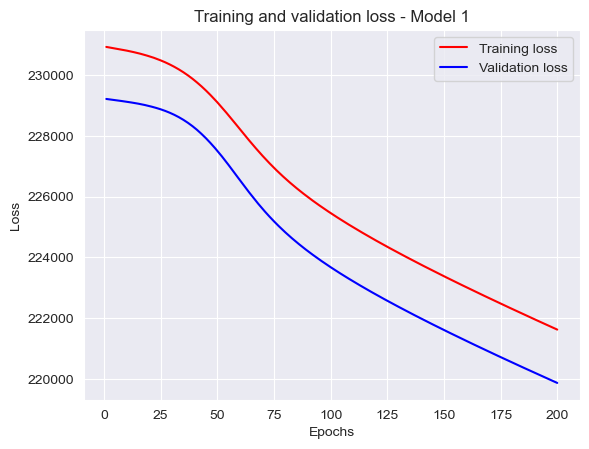

In [28]:
loss= history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [29]:
#sn = Shallow and Narrow
sn = model_1.predict(x_test_sc[:5])
print("Predicted values are: ", sn)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 111ms/step
Predicted values are:  [[11.096268  11.65137  ]
 [11.081964  11.634907 ]
 [11.089299  11.647032 ]
 [11.098592  11.653048 ]
 [11.086861  11.6377945]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [30]:
# MODEL 2
model_2 = Sequential()
model_2.add(Dense(128, input_dim=3, activation = 'tanh'))
model_2.add(Dense(128, activation='tanh'))
model_2.add(Dense(2, activation='linear'))
model_2.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_2.summary()
early_stopping2 = EarlyStopping(monitor='val_loss', patience = 10)
history2 = model_2.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping2], verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               512       
                                                                 
 dense_23 (Dense)            (None, 128)               16512     
                                                                 
 dense_24 (Dense)            (None, 2)                 258       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


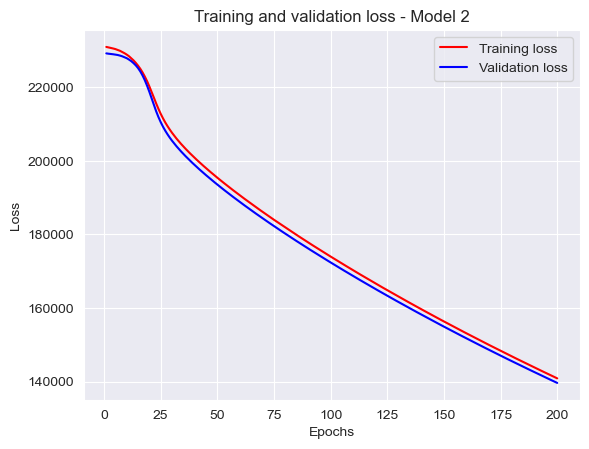

In [31]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
#sw = Shallow and Wide
sw = model_2.predict(x_test_sc[:5])
print("Predicted values are: ", sw)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 114ms/step
Predicted values are:  [[128.32098 109.2839 ]
 [128.31406 109.27794]
 [128.31625 109.28018]
 [128.32198 109.28457]
 [128.31293 109.27644]]
Real values are:       SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [33]:
# MODEL 3
model_3 = Sequential()
model_3.add(Dense(128, input_dim=3, activation='tanh'))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dense(48, activation='tanh'))
model_3.add(Dense(48, activation='tanh'))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(2, activation='linear'))

# compile model
model_3.compile(loss='mean_squared_error', optimizer='adam', metrics =['mae'])
model_3.summary()
early_stopping3 = EarlyStopping(monitor='val_loss', patience = 10)
history3 = model_3.fit(x_train_sc, y_train, validation_split=0.2, epochs=200, callbacks=[early_stopping3], verbose =0)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               512       
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 48)                3120      
                                                                 
 dense_29 (Dense)            (None, 48)                2352      
                                                                 
 dense_30 (Dense)            (None, 32)                1568      
                                                                 
 dense_31 (Dense)            (None, 32)               

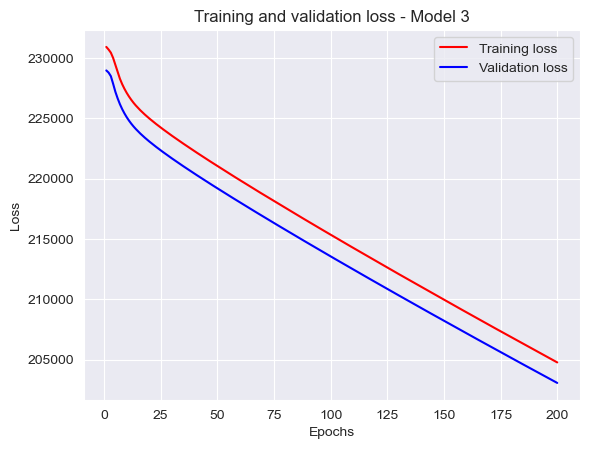

In [34]:
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
# dw = Deep and Wide
dw = model_3.predict(x_test_sc[:5])
print("Predicted values are: \n", dw)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 62ms/step
Predicted values are: 
 [[33.962124 26.663685]
 [33.96212  26.663683]
 [33.96212  26.663681]
 [33.962124 26.663687]
 [33.96212  26.663683]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [36]:
model_4 = Sequential()
model_4.add(Dense(8, input_dim=3, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(8, activation='tanh'))
model_4.add(Dense(2, activation='linear'))

# compile model
model_4.compile(loss='mean_squared_error', optimizer='adam', metrics = ['mae'])
model_4.summary()
early_stopping4 = EarlyStopping(monitor='val_loss', patience = 10)
history4 = model_4.fit(x_train_sc, y_train, validation_split =0.2, epochs=200, callbacks=[early_stopping4], verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 32        
                                                                 
 dense_34 (Dense)            (None, 8)                 72        
                                                                 
 dense_35 (Dense)            (None, 8)                 72        
                                                                 
 dense_36 (Dense)            (None, 8)                 72        
                                                                 
 dense_37 (Dense)            (None, 2)                 18        
                                                                 
Total params: 266
Trainable params: 266
Non-trainable params: 0
_________________________________________________________________


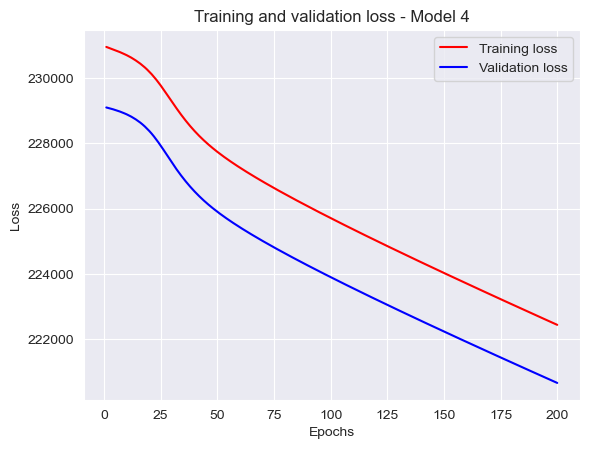

In [37]:
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model 4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
#dn = Deep and Narrow
dn = model_4.predict(x_test_sc[:5])
print("Predicted values are: \n", dn)
print("Real values are: \n", y_test[:5])

1/1 [==============================] - 0s 49ms/step
Predicted values are: 
 [[10.850847   8.295054 ]
 [10.850443   8.294754 ]
 [10.85002    8.294438 ]
 [10.8511095  8.295248 ]
 [10.850723   8.294947 ]]
Real values are: 
      SCF  TEMP
19   687   259
23   707   214
111  597   247
39   735   225
1    895   184


In [39]:
# Optimal Architecture using Hyperbolic Tangent Activation Function
mse1, mae1 = model_1.evaluate(x_test_sc, y_test)
mse2, mae2 = model_2.evaluate(x_test_sc, y_test)
mse3, mae3 = model_3.evaluate(x_test_sc, y_test)
mse4, mae4 = model_4.evaluate(x_test_sc, y_test) 
print(f"\nMean squared error and Mean absolute error from ANN1 is {mse1: .3f} and {mae1: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN2 is {mse2: .3f} and {mae2: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN3 is {mse3: .3f} and {mae3: .3f} respectively")
print(f"\nMean squared error and Mean absolute error from ANN4 is {mse4: .3f} and {mae4: .3f} respectively")

2/2 [==============================] - 0s 3ms/step - loss: 264658.2812 - mae: 444.9402

Mean squared error and Mean absolute error from ANN1 is  263824.656 and  443.147 respectively

Mean squared error and Mean absolute error from ANN2 is  175445.078 and  335.714 respectively

Mean squared error and Mean absolute error from ANN3 is  245482.578 and  424.200 respectively

Mean squared error and Mean absolute error from ANN4 is  264658.281 and  444.940 respectively


The optimal ANN architecture when activation function changed and the optimal architecture was the Shallow and Wide Network. In addition, the hyperbolic tangent activation function was not ideal in predicting the ouptut and contains large values of mean absolute errors.